In [1]:
# Importing libraries.

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
avg_scores = pd.read_csv('input_data/naep.csv')
poverty_income = pd.read_csv('input_data/poverty_income.csv')
unemploy_crime = pd.read_csv('input_data/unemployment_crime.csv')

In [3]:
avg_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1836 non-null   int64  
 1   state      1836 non-null   object 
 2   avg_score  1836 non-null   float64
 3   subject    1836 non-null   object 
 4   grade      1836 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 71.8+ KB


In [4]:
avg_scores['avg_score'] = avg_scores['avg_score'].apply(pd.to_numeric, errors = 'coerce')
avg_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1836 non-null   int64  
 1   state      1836 non-null   object 
 2   avg_score  1836 non-null   float64
 3   subject    1836 non-null   object 
 4   grade      1836 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 71.8+ KB


In [5]:
unemploy_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 459 non-null    int64  
 1   state                459 non-null    object 
 2   unemployment_rate    459 non-null    float64
 3   violent_crime_rate   459 non-null    float64
 4   property_crime_rate  459 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 18.1+ KB


In [6]:
avg_scores.head()

,year,state,avg_score,subject,grade
0,2019,Alabama,268.703899,Mathematics,8
1,2019,Alaska,274.337801,Mathematics,8
2,2019,Arizona,279.932022,Mathematics,8
3,2019,Arkansas,274.363192,Mathematics,8
4,2019,California,275.608909,Mathematics,8


In [7]:
poverty_income.head()

,year,state,poverty_percent,median_income
0,2019,Alabama,15.6,51771
1,2019,Alaska,10.2,77203
2,2019,Arizona,13.5,62027
3,2019,Arkansas,16.0,49020
4,2019,California,11.8,80423


In [8]:
unemploy_crime.head()

,year,state,unemployment_rate,violent_crime_rate,property_crime_rate
0,2019,Alabama,3.0,504.67,2622.80
1,2019,Alaska,5.4,865.05,2902.52
2,2019,Arizona,4.9,447.12,2435.98
3,2019,Arkansas,3.5,580.84,2847.71
4,2019,California,4.2,442.07,2335.78


In [9]:
merged_df = pd.merge(avg_scores, poverty_income, how = 'left' , left_on =['state', 'year'], right_on=['state', 'year'])
merged_df = pd.merge(merged_df, unemploy_crime, how = 'left' , left_on =['state', 'year'], right_on=['state', 'year'])
merged_df

,year,state,avg_score,subject,grade,poverty_percent,median_income,unemployment_rate,violent_crime_rate,property_crime_rate
0,2019,Alabama,268.703899,Mathematics,8,15.6,51771,3.0,504.67,2622.80
1,2019,Alaska,274.337801,Mathematics,8,10.2,77203,5.4,865.05,2902.52
2,2019,Arizona,279.932022,Mathematics,8,13.5,62027,4.9,447.12,2435.98
3,2019,Arkansas,274.363192,Mathematics,8,16.0,49020,3.5,580.84,2847.71
4,2019,California,275.608909,Mathematics,8,11.8,80423,4.2,442.07,2335.78
...,...,...,...,...,...,...,...,...,...,...
1831,2003,Virginia,223.340359,Reading,4,10.0,50028,4.1,278.20,2721.54
1832,2003,Washington,221.096695,Reading,4,11.0,48185,7.4,346.94,4754.98
1833,2003,West Virginia,219.179525,Reading,4,16.3,32967,6.0,255.43,2339.02
1834,2003,Wisconsin,220.833428,Reading,4,8.9,46538,5.7,221.11,2880.45


In [10]:
math_merged_df = merged_df.loc[(merged_df['subject'] == 'Mathematics')]
math_4_merged_df = math_merged_df.loc[(merged_df['grade'] == 4)]
math_4_merged_df


,year,state,avg_score,subject,grade,poverty_percent,median_income,unemployment_rate,violent_crime_rate,property_crime_rate
459,2019,Alabama,229.651002,Mathematics,4,15.6,51771,3.0,504.67,2622.80
460,2019,Alaska,232.307479,Mathematics,4,10.2,77203,5.4,865.05,2902.52
461,2019,Arizona,237.610210,Mathematics,4,13.5,62027,4.9,447.12,2435.98
462,2019,Arkansas,233.252134,Mathematics,4,16.0,49020,3.5,580.84,2847.71
463,2019,California,234.721976,Mathematics,4,11.8,80423,4.2,442.07,2335.78
...,...,...,...,...,...,...,...,...,...,...
913,2003,Virginia,239.203089,Mathematics,4,10.0,50028,4.1,278.20,2721.54
914,2003,Washington,238.292840,Mathematics,4,11.0,48185,7.4,346.94,4754.98
915,2003,West Virginia,230.767749,Mathematics,4,16.3,32967,6.0,255.43,2339.02
916,2003,Wisconsin,236.755414,Mathematics,4,8.9,46538,5.7,221.11,2880.45


In [11]:
math_4_merged_df = math_4_merged_df.drop(columns = 'year')
math_4_merged_df = math_4_merged_df.drop(columns = 'state')
math_4_merged_df = math_4_merged_df.drop(columns = 'subject')
math_4_merged_df = math_4_merged_df.drop(columns = 'grade')
math_4_merged_df = math_4_merged_df.drop(columns = 'violent_crime_rate')
math_4_merged_df = math_4_merged_df.drop(columns = 'property_crime_rate')
math_4_merged_df

,avg_score,poverty_percent,median_income,unemployment_rate
459,229.651002,15.6,51771,3.0
460,232.307479,10.2,77203,5.4
461,237.610210,13.5,62027,4.9
462,233.252134,16.0,49020,3.5
463,234.721976,11.8,80423,4.2
...,...,...,...,...
913,239.203089,10.0,50028,4.1
914,238.292840,11.0,48185,7.4
915,230.767749,16.3,32967,6.0
916,236.755414,8.9,46538,5.7


In [12]:
math_4_merged_df.isnull().sum()

avg_score            0
poverty_percent      0
median_income        0
unemployment_rate    0
dtype: int64

In [13]:
math_4_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 459 entries, 459 to 917
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_score          459 non-null    float64
 1   poverty_percent    459 non-null    float64
 2   median_income      459 non-null    int64  
 3   unemployment_rate  459 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 17.9 KB


In [14]:
# use StandardScaler to standardize the dataset
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(math_4_merged_df)

In [15]:
# apply PCA to preserve 90% of the explained variance 
pca = PCA(n_components = 0.90)
merged_pca = pca.fit_transform(math_4_merged_df)

In [16]:
# further reduce dataset dimensions with t-SNE
tsne = TSNE()
tsne_features = tsne.fit_transform(merged_pca)
tsne_features.shape

(459, 2)

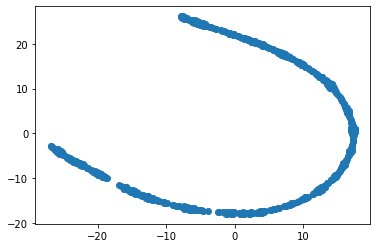

In [17]:
# create a scatter plot to identify distinct clusters
x = tsne_features[:,0]
y = tsne_features[:,1]

plt.scatter(x,y)
plt.show()

In [18]:
# create empty list to find best value for k between 1 and 10
inertia = []
k = list(range(1,11))

# use for loop to calculate inertia for each k in range
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(tsne_features)
    inertia.append(kmeans.inertia_)

C:\Users\amylb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


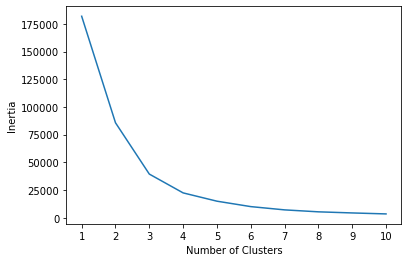

In [19]:
# create the elbow curve
elbow_input = {'k' : k, 'inertia' : inertia}
elbow_df = pd.DataFrame(elbow_input)

plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [88]:
reading_merged_df = merged_df.loc[(merged_df['subject'] == 'Reading')]
read_4_merged_df = reading_merged_df.loc[(reading_merged_df['grade'] == 4)]
read_4_merged_df

,year,state,avg_score,subject,grade,poverty_percent,median_income,unemployment_rate,violent_crime_rate,property_crime_rate
1377,2019,Alabama,211.728520,Reading,4,15.6,51771,3.0,504.67,2622.80
1378,2019,Alaska,204.373572,Reading,4,10.2,77203,5.4,865.05,2902.52
1379,2019,Arizona,215.841231,Reading,4,13.5,62027,4.9,447.12,2435.98
1380,2019,Arkansas,215.054222,Reading,4,16.0,49020,3.5,580.84,2847.71
1381,2019,California,216.481266,Reading,4,11.8,80423,4.2,442.07,2335.78
...,...,...,...,...,...,...,...,...,...,...
1831,2003,Virginia,223.340359,Reading,4,10.0,50028,4.1,278.20,2721.54
1832,2003,Washington,221.096695,Reading,4,11.0,48185,7.4,346.94,4754.98
1833,2003,West Virginia,219.179525,Reading,4,16.3,32967,6.0,255.43,2339.02
1834,2003,Wisconsin,220.833428,Reading,4,8.9,46538,5.7,221.11,2880.45


In [89]:
read_4_merged_df = read_4_merged_df.drop(columns = 'year')
read_4_merged_df = read_4_merged_df.drop(columns = 'state')
read_4_merged_df = read_4_merged_df.drop(columns = 'subject')
read_4_merged_df = read_4_merged_df.drop(columns = 'grade')
read_4_merged_df

,avg_score,poverty_percent,median_income,unemployment_rate,violent_crime_rate,property_crime_rate
1377,211.728520,15.6,51771,3.0,504.67,2622.80
1378,204.373572,10.2,77203,5.4,865.05,2902.52
1379,215.841231,13.5,62027,4.9,447.12,2435.98
1380,215.054222,16.0,49020,3.5,580.84,2847.71
1381,216.481266,11.8,80423,4.2,442.07,2335.78
...,...,...,...,...,...,...
1831,223.340359,10.0,50028,4.1,278.20,2721.54
1832,221.096695,11.0,48185,7.4,346.94,4754.98
1833,219.179525,16.3,32967,6.0,255.43,2339.02
1834,220.833428,8.9,46538,5.7,221.11,2880.45


In [90]:
# use StandardScaler to standardize the dataset
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(read_4_merged_df)

In [91]:
# apply PCA to preserve 90% of the explained variance 
pca = PCA(n_components = 0.90)
merged_pca = pca.fit_transform(read_4_merged_df)

In [92]:
# further reduce dataset dimensions with t-SNE
tsne = TSNE()
tsne_features = tsne.fit_transform(merged_pca)
tsne_features.shape

(459, 2)

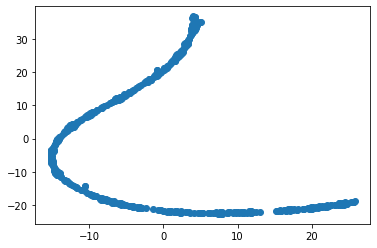

In [93]:
# create a scatter plot to identify distinct clusters
x = tsne_features[:,0]
y = tsne_features[:,1]

plt.scatter(x,y)
plt.show()

In [94]:
# create empty list to find best value for k between 1 and 10
inertia = []
k = list(range(1,11))

# use for loop to calculate inertia for each k in range
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(tsne_features)
    inertia.append(kmeans.inertia_)

C:\Users\amylb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


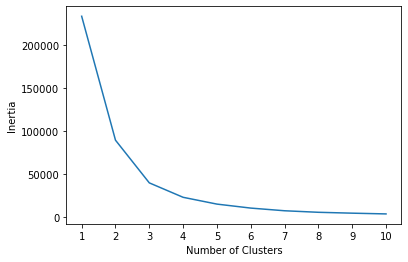

In [95]:
# create the elbow curve
elbow_input = {'k' : k, 'inertia' : inertia}
elbow_df = pd.DataFrame(elbow_input)

plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()